In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
pd.set_option('display.min_rows', 20)

## Importing the Data

In [5]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy() # copy the dataframe to preserve data sanbctity

In [7]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


## Examining the data

In [6]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [8]:
df_comp.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [10]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [12]:
df_comp['spx'].isna().sum()

0

## Plotting the data

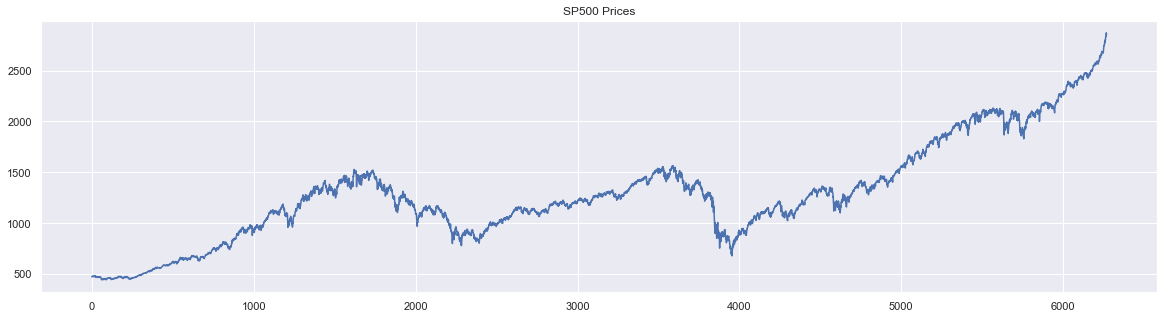

In [18]:
df_comp.spx.plot(figsize=(20,5),title='SP500 Prices')
plt.show()

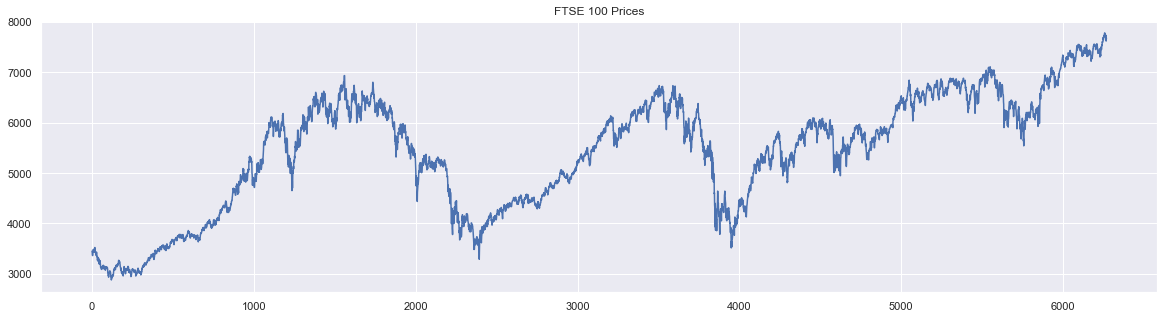

In [19]:
df_comp['ftse'].plot(figsize=(20,5), title='FTSE 100 Prices')
plt.show()

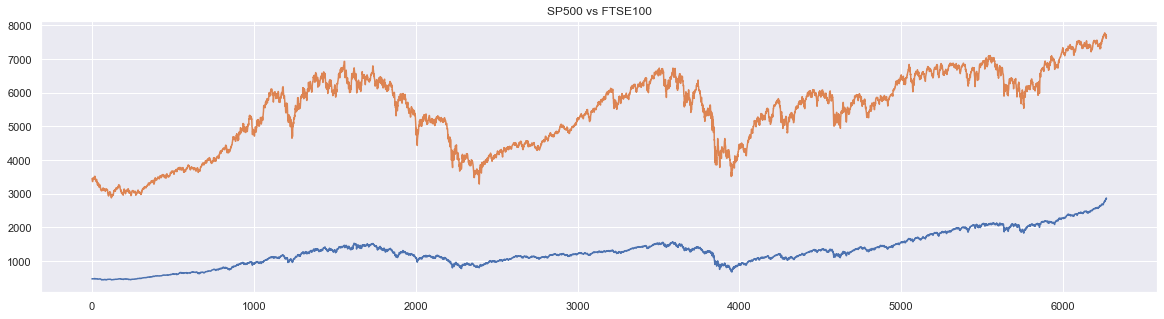

In [20]:
df_comp.spx.plot(figsize=(20,5),title='SP500 Prices')
df_comp['ftse'].plot(figsize=(20,5), title='FTSE 100 Prices')
plt.title('SP500 vs FTSE100')
plt.show()


## The QQ Plot
+ shows how the data fits a Normal Distribution

In [22]:
import scipy.stats
import pylab

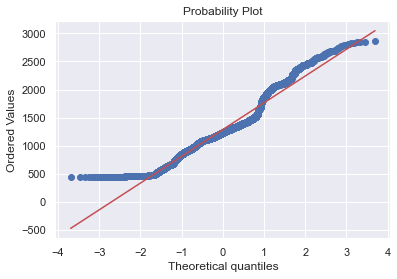

In [24]:
scipy.stats.probplot(df_comp['spx'],plot = pylab)
plt.show()
# x axis shows how many standard devations awawy from the mean the values are

# Length of the time period

In [26]:
df_comp['date'].describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

## From text to date

In [29]:
df_comp.date = pd.to_datetime(df_comp['date'], dayfirst=True)

In [30]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [40]:
df_comp['date'].describe()

KeyError: 'date'

## Setting the index

In [41]:
df_comp_ = df_comp.copy()
df_comp_.set_index('date', inplace=True)

KeyError: "None of ['date'] are in the columns"

In [42]:
df_comp_.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the Desired Frequency

In [47]:
df_comp_ = df_comp_.asfreq('d') # can also use 'b' for business days
df_comp_.dropna(inplace=True)
df_comp_.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## handling Missing values

In [49]:
df_comp_.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [52]:
df_comp.spx = df_comp.spx.fillna(method='ffill')
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [55]:
df_comp.ftse = df_comp.ftse.fillna(method='bfill')
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [57]:
df_comp.dax = df_comp.dax.fillna(value=df_comp.dax.mean())
df_comp.dax

date
1994-01-07     2224.95
1994-01-10     2225.00
1994-01-11     2228.10
1994-01-12     2182.06
1994-01-13     2142.37
1994-01-14     2151.05
1994-01-17     2115.56
1994-01-18     2130.35
1994-01-19     2132.52
1994-01-20     2098.36
                ...   
2018-01-16    13246.33
2018-01-17    13183.96
2018-01-18    13281.43
2018-01-19    13434.45
2018-01-22    13463.69
2018-01-23    13559.60
2018-01-24    13414.74
2018-01-25    13298.36
2018-01-26    13340.17
2018-01-29    13324.48
Name: dax, Length: 6269, dtype: float64

In [58]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Simplifying the dataset

In [59]:
df_comp['market_value'] = df_comp.spx

In [60]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6269.000000,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700,1288.127542
std,487.586473,2754.361032,1145.572428,4043.122953,487.586473
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,990.671905,4069.350000,4486.100000,10709.290000,990.671905
50%,1233.420000,5773.340000,5662.430000,15028.170000,1233.420000
75%,1459.987747,7443.070000,6304.250000,17860.470000,1459.987747
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [61]:
del df_comp['dax']

In [62]:
df_comp.describe()

,spx,ftse,nikkei,market_value
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,5422.713545,14597.055700,1288.127542
std,487.586473,1145.572428,4043.122953,487.586473
min,438.920000,2876.600000,7054.980000,438.920000
25%,990.671905,4486.100000,10709.290000,990.671905
50%,1233.420000,5662.430000,15028.170000,1233.420000
75%,1459.987747,6304.250000,17860.470000,1459.987747
max,2872.867839,7778.637689,24124.150000,2872.867839


## Splitting the data

In [63]:
size = int(len(df_comp)*.8)

In [64]:
df = df_comp.iloc[:size]

In [65]:
df_test = df_comp.iloc[size:]